SVM Model Implementation

Why SVM? 
Can be used even for data sets which are not linear seperable.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltM

In [15]:
df = pd.read_csv('heart.csv')
# Print the first 5 rows of the dataframe
df.tail()
# df.shape
# df.size
# df['target'].value_counts()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


<Axes: xlabel='age', ylabel='thalach'>

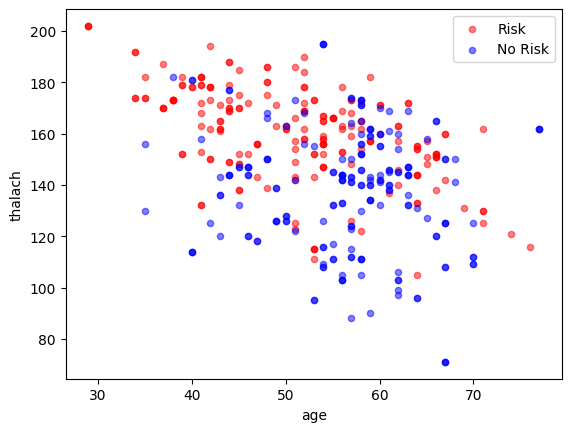

In [21]:
risk = df[df['target'] == 1][0:200]
no_risk = df[df['target'] == 0][0:200]

axes = risk.plot(kind='scatter', x='age', y='thalach', color='red', label='Risk', alpha=0.5)
no_risk.plot(kind='scatter', x='age', y='thalach', color='blue', label='No Risk', alpha=0.5, ax = axes) 

In [23]:
df.dtypes
X = np.asarray(df)
Y = np.asarray(df['target'])


array([[ 52. ,   1. ,   0. , 125. , 212. ,   0. ,   1. , 168. ,   0. ,
          1. ,   2. ,   2. ,   3. ,   0. ],
       [ 53. ,   1. ,   0. , 140. , 203. ,   1. ,   0. , 155. ,   1. ,
          3.1,   0. ,   0. ,   3. ,   0. ],
       [ 70. ,   1. ,   0. , 145. , 174. ,   0. ,   1. , 125. ,   1. ,
          2.6,   0. ,   0. ,   3. ,   0. ],
       [ 61. ,   1. ,   0. , 148. , 203. ,   0. ,   1. , 161. ,   0. ,
          0. ,   2. ,   1. ,   3. ,   0. ],
       [ 62. ,   0. ,   0. , 138. , 294. ,   1. ,   1. , 106. ,   0. ,
          1.9,   1. ,   3. ,   2. ,   0. ]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=4)
X_train.shape

(820, 14)

In [29]:
from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, Y_train)

y_predict = classifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        98

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

